# Mersenne Twister in Python 

Try to rebuild the pseudo-random algorithm *Mersenne Twister*, which is used in python's random library. 

Also with a basic *Random* class and some simple methods for easily testing.

## MT19937.py 

Main part of the algorithm.

Convert the pseudocode in [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister) to python code.

Coefficients follow the standard of *MT19937-32*.

## RandomClass.py 

A class named *Random*.

### Usage
Firstly, build a Random object. if no input, seed will default to 0.
``` python
>>> name = Random(seed)
```

&nbsp;

**.random()**:

return uniform ditribution in [0,1)
``` python
>>> name.random()
0.1786995275775844
```

&nbsp;

**.randint(begin_number, end_number)**:

return random int in [a,b)
``` python
>>> name.randin(1,10)
9
```

&nbsp;

**.shuffle(sequence)**:

shuffle the input sequence
``` python
>>> name.shuffle([1,2,3,4,5])
[2, 1, 5, 3, 4]
```

&nbsp;

**.choice(sequence, replace=True, size=1)**:

choice an element randomly in the sequence.

replace: choose with replacement or not.

size: the number of element to be chosen, if size != 1, will return a list contains those element.
``` python
>>> name.choice([1,2,3,4,5])
1
>>> name.choice([1,2,3,4,5],size=3)
[2, 3, 2]
>>> name.choice([1,2,3,4,5],replace=False,size=3)
[2, 5, 1]
```

&nbsp;

**.bern(p)**:

generate a Bernoulli Random Variable

p: the probability of True

```
>>> name.bern(0.5)
True
>>> name.bern(0.5)
False
```

&nbsp;

**.binomial(n, p)**:

generate a Binomial Random Variable

n: total times

p: probability of success
```
>>> name.binomial(10, 0.5)
6
>>> name.binomial(10, 0.5)
3
```


&nbsp;

**.geometric(p)**:

generate a Geometric Random Variable
            
p: probability of success
```
>>> name.geometric(0.5)
1
>>> name.geometric(0.5)
2
```


## Randomness Testing

The file *Testing for Randomness.ipynb* contains several basic randomness testing result for this algorithm.



# Testing for Randomness

In [2]:
from RandomClass import Random
import matplotlib.pyplot as plt   
from collections import Counter
import random
%matplotlib inline


In [3]:
test = Random(5489) #initial 

## The Spectral Test
generate int in range [0,100]. 

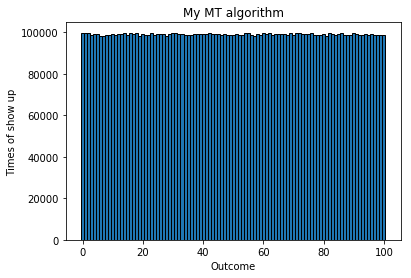

In [4]:
num_trials = 10**7

s = [test.randint(0,101) for n in range(num_trials)]  
y = [s.count(n) for n in range(101)]

# your code here
plt.bar(range(101),y, width=1.0, edgecolor='black')
plt.title('My MT algorithm')
plt.ylabel("Times of show up")
plt.xlabel('Outcome')
plt.show()

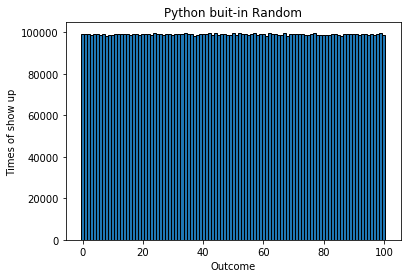

In [7]:
num_trials = 10**7
random.seed(5489)
s = [random.randint(0,100) for n in range(num_trials)]  
y = [s.count(n) for n in range(101)]

# your code here
plt.bar(range(101),y, width=1.0, edgecolor='black')
plt.title('Python buit-in Random')
plt.ylabel("Times of show up")
plt.xlabel('Outcome')
plt.show()

#print(s.count(100))

###  Permutation Test
Compare relative ordering for every pair of random number.

The first value in the outcome shows times of number 1 > number 2.

The second value in the outcome shows times of number 2 >= number 1.

In [8]:
def randomness_my_test(N):
    x = [0] * 2
    
    while N>0:
        if test.random() < test.random():
            x[0] += 1
        else:
            x[1] += 1
        N -= 1
    
    print(x)
    return 

print('This is my MT algorithm')
randomness_my_test(10**7)  

This is my MT algorithm
[5000056, 4999944]


In [33]:
def randomness_test(N):
    x = [0] * 2
    
    while N>0:
        if random.random() < random.random():
            x[0] += 1
        else:
            x[1] += 1
        N -= 1
    
    print(x)
    return 

print('This is Python built-in random library')
randomness_test(10**7)  

This is Python built-in random library
[5001512, 4998488]


### Pixel Testing
Put black pixels randomly in a 500X500 white png.

50000 times

![50000](img/50000.png)

300000 times

![300000](img/300000.png)

500000 times

![500000](img/500000.png)

700000 times

![700000](img/700000.png)

5000000 times

![over_number](img/over_number.png)